#  WEATHER TYPE PREDICTION

## A Comparative Analysis of Popular Machine Learning Classifiers: 
# Naive Bayes, KNN, SVM, Random Forest, Decision Tree, and Logistic Regression


In [3]:
#Importing all the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#loading the dataset
df=pd.read_csv("weather1.csv")
df

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
13195           10        74        14.5                 71   
13196           -1        76         3.5                 23   
13197           30        77         5.5                 28   
13198            3        76        10.0                 94   
13199           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  
0                   1010.82         2              3.5        Rainy  
1                   1011.43         7             10.0       Cloudy  
2                   1018.72         5              5.5        Sunny  
3                   1026.25         7              1.0        Sunny  
4                    990.67         1              2.5        Rainy  
...                     ...       ...              ...          ...  
13195               1003.15         1              1.0        Rainy  
13196               1067.23         1              6.0        Snowy  
13197               1012.69         3              9.0       Cloudy  
13198                984.27         0              2.0        Snowy  
13199               1015.37         5             10.0        Rainy  

[13200 rows x 8 columns]

## Step1: ANALYSIS OF DATA-

In [5]:
#shape of the data
df.shape

(13200, 8)

In [6]:
#size of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Atmospheric Pressure  13200 non-null  float64
 5   UV Index              13200 non-null  int64  
 6   Visibility (km)       13200 non-null  float64
 7   Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 825.1+ KB


In [8]:
#number of rows in each column
df.count()

Temperature             13200
Humidity                13200
Wind Speed              13200
Precipitation (%)       13200
Atmospheric Pressure    13200
UV Index                13200
Visibility (km)         13200
Weather Type            13200
dtype: int64

In [7]:
#description of statistical functions
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [8]:
#Top 5 columns
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0           14        73         9.5                 82               1010.82   
1           39        96         8.5                 71               1011.43   
2           30        64         7.0                 16               1018.72   
3           38        83         1.5                 82               1026.25   
4           27        74        17.0                 66                990.67   

   UV Index  Visibility (km) Weather Type  
0         2              3.5        Rainy  
1         7             10.0       Cloudy  
2         5              5.5        Sunny  
3         7              1.0        Sunny  
4         1              2.5        Rainy

In [9]:
#Bottom 5 columns
df.tail()

Temperature  Humidity  Wind Speed  Precipitation (%)  \
13195           10        74        14.5                 71   
13196           -1        76         3.5                 23   
13197           30        77         5.5                 28   
13198            3        76        10.0                 94   
13199           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  
13195               1003.15         1              1.0        Rainy  
13196               1067.23         1              6.0        Snowy  
13197               1012.69         3              9.0       Cloudy  
13198                984.27         0              2.0        Snowy  
13199               1015.37         5             10.0        Rainy

## Step 2: MAPPING OF CATEGORICAL DATA-

In [10]:
#finding unique values in categorical data:

df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [11]:
#Mapping of categorical values to numeric by using map function:
# map function , converting in numeriical values
df['Weather Type']=df['Weather Type'].map({'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3})

In [13]:
df #values of diabetes columns are changes to binary(0 and 1)

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
13195           10        74        14.5                 71   
13196           -1        76         3.5                 23   
13197           30        77         5.5                 28   
13198            3        76        10.0                 94   
13199           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
13195               1003.15         1              1.0             0  
13196               1067.23         1              6.0             3  
13197               1012.69         3              9.0             1  
13198                984.27         0              2.0             3  
13199               1015.37         5             10.0             0  

[13200 rows x 8 columns]

## Step 3: FINDING NULL AND DUPLICATED VALUES


In [14]:
#finding sum of null values in each column
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Atmospheric Pressure    0
UV Index                0
Visibility (km)         0
Weather Type            0
dtype: int64

#### so, there are no null values

In [19]:
#finding duplicated values in each column
df.duplicated().sum()

0

#### so, there are no duplicated values

## Step 4: OUTLIER DETECTION-

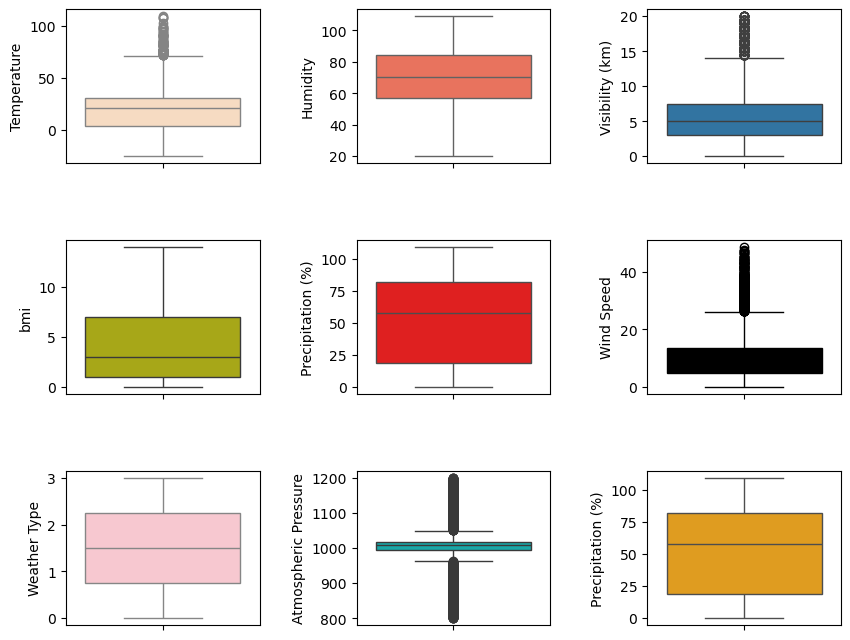

In [22]:
fig=plt.figure(figsize=(10,8))
#1 graph
ax=plt.subplot(331)
ax=sns.boxplot(y='Temperature',color='peachpuff',data=df)
ax.set_ylabel('Temperature')

#2 graph
ax1=plt.subplot(332)
ax1=sns.boxplot(y='Humidity',color='tomato',data=df)
ax1.set_ylabel('Humidity')

#3 graph
ax2=plt.subplot(333)
ax2=sns.boxplot(y='Visibility (km)',data=df)
ax2.set_ylabel('Visibility (km)')

#4 graph
ax3=plt.subplot(334)
ax3=sns.boxplot(y='UV Index',color='y',data=df)
ax3.set_ylabel('bmi')

#5 graph
ax4=plt.subplot(335)
ax4=sns.boxplot(y='Precipitation (%)',color='r',data=df)
ax4.set_ylabel('Precipitation (%)')

#6 graph
ax5=plt.subplot(336)
ax5=sns.boxplot(y='Wind Speed',color='k',data=df)
ax5.set_ylabel('Wind Speed')

#7graph
ax6=plt.subplot(337)
ax6=sns.boxplot(y='Weather Type',color='pink',data=df)
ax6.set_ylabel('Weather Type')


#8graph
ax7=plt.subplot(338)
ax7=sns.boxplot(y='Atmospheric Pressure',color='c',data=df)
ax7.set_ylabel('Atmospheric Pressure')



#9graph
ax8=plt.subplot(339)
ax8=sns.boxplot(y='Precipitation (%)',color='orange',data=df)
ax8.set_ylabel('Precipitation (%)')

##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

#### so, 'Wind speed' and 'Atmospheric Pressure' have maximum outliers

### Removing outliers by IQR Method

In [19]:
#finding the interquartile range of the column
q1=df['Wind Speed'].quantile(0.25)
q3=df['Wind Speed'].quantile(0.75)
iqr=q3-q1
print('First Quartile is:',q1)
print('Third Quartile is:',q3)
print('Inter Quartile Range is:',iqr)

#diving the column in two halves
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('Upper limit is:',upper_limit)
print('Lower limit is:',lower_limit)

First Quartile is: 5.0
Third Quartile is: 13.5
Inter Quartile Range is: 8.5
Upper limit is: 26.25
Lower limit is: -7.75


In [20]:
#filtering or removing the outliers from that column
df1= df[(df['Wind Speed']>= lower_limit) & (df['Wind Speed']<= upper_limit)]
df1

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
13195           10        74        14.5                 71   
13196           -1        76         3.5                 23   
13197           30        77         5.5                 28   
13198            3        76        10.0                 94   
13199           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
13195               1003.15         1              1.0             0  
13196               1067.23         1              6.0             3  
13197               1012.69         3              9.0             1  
13198                984.27         0              2.0             3  
13199               1015.37         5             10.0             0  

[12796 rows x 8 columns]

#### As some rows are deleted so, resetting the index

In [21]:
df1=df1.reset_index()
df1.drop(columns=['index'],inplace=True)

In [22]:
df1 

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
12791           10        74        14.5                 71   
12792           -1        76         3.5                 23   
12793           30        77         5.5                 28   
12794            3        76        10.0                 94   
12795           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
12791               1003.15         1              1.0             0  
12792               1067.23         1              6.0             3  
12793               1012.69         3              9.0             1  
12794                984.27         0              2.0             3  
12795               1015.37         5             10.0             0  

[12796 rows x 8 columns]

#### Outliers removes from 'Atmospheric Pressure'

In [24]:
#finding the interquartile range of the column
q1=df1['Atmospheric Pressure'].quantile(0.25)
q3=df1['Atmospheric Pressure'].quantile(0.75)
iqr=q3-q1
print('First Quartile is:',q1)
print('Third Quartile is:',q3)
print('Inter Quartile Range is:',iqr)

#diving the column in two halves
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('Upper limit is:',upper_limit)
print('Lower limit is:',lower_limit)

First Quartile is: 994.98
Third Quartile is: 1016.92
Inter Quartile Range is: 21.93999999999994
Upper limit is: 1049.83
Lower limit is: 962.0700000000002


In [25]:
#filtering or removing the outliers from that column
df2= df1[(df1['Atmospheric Pressure']>= lower_limit) & (df1['Atmospheric Pressure']<= upper_limit)]
df2

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
12790           29        62        13.0                 17   
12791           10        74        14.5                 71   
12793           30        77         5.5                 28   
12794            3        76        10.0                 94   
12795           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
12790               1002.81         2              5.0             1  
12791               1003.15         1              1.0             0  
12793               1012.69         3              9.0             1  
12794                984.27         0              2.0             3  
12795               1015.37         5             10.0             0  

[11869 rows x 8 columns]

#### As, some rows are deleted so, resetting the index:

In [26]:
df2=df2.reset_index()
df2.drop(columns=['index'],inplace=True)

In [27]:
df2

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
11864           29        62        13.0                 17   
11865           10        74        14.5                 71   
11866           30        77         5.5                 28   
11867            3        76        10.0                 94   
11868           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
11864               1002.81         2              5.0             1  
11865               1003.15         1              1.0             0  
11866               1012.69         3              9.0             1  
11867                984.27         0              2.0             3  
11868               1015.37         5             10.0             0  

[11869 rows x 8 columns]

In [28]:
#finding the interquartile range of the column
q1=df2['Atmospheric Pressure'].quantile(0.25)
q3=df2['Atmospheric Pressure'].quantile(0.75)
iqr=q3-q1
print('First Quartile is:',q1)
print('Third Quartile is:',q3)
print('Inter Quartile Range is:',iqr)

#diving the column in two halves
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('Upper limit is:',upper_limit)
print('Lower limit is:',lower_limit)

First Quartile is: 995.81
Third Quartile is: 1016.35
Inter Quartile Range is: 20.540000000000077
Upper limit is: 1047.16
Lower limit is: 964.9999999999998


In [29]:
#filtering or removing the outliers from that column
df3= df2[(df2['Atmospheric Pressure']>= lower_limit) & (df2['Atmospheric Pressure']<= upper_limit)]
df3

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
11864           29        62        13.0                 17   
11865           10        74        14.5                 71   
11866           30        77         5.5                 28   
11867            3        76        10.0                 94   
11868           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
11864               1002.81         2              5.0             1  
11865               1003.15         1              1.0             0  
11866               1012.69         3              9.0             1  
11867                984.27         0              2.0             3  
11868               1015.37         5             10.0             0  

[11856 rows x 8 columns]

In [30]:
df3=df3.reset_index()
df3.drop(columns=['index'],inplace=True)
df3

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
11851           29        62        13.0                 17   
11852           10        74        14.5                 71   
11853           30        77         5.5                 28   
11854            3        76        10.0                 94   
11855           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  
0                   1010.82         2              3.5             0  
1                   1011.43         7             10.0             1  
2                   1018.72         5              5.5             2  
3                   1026.25         7              1.0             2  
4                    990.67         1              2.5             0  
...                     ...       ...              ...           ...  
11851               1002.81         2              5.0             1  
11852               1003.15         1              1.0             0  
11853               1012.69         3              9.0             1  
11854                984.27         0              2.0             3  
11855               1015.37         5             10.0             0  

[11856 rows x 8 columns]

### Removed outliers from major columns-

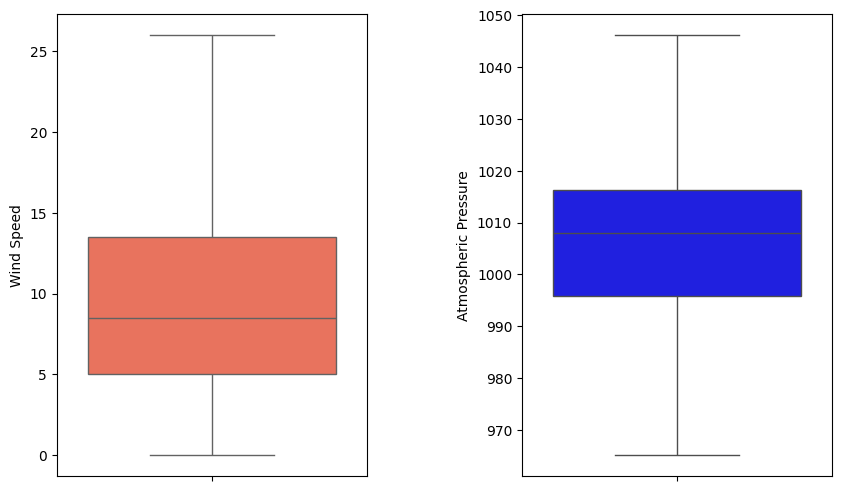

In [31]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(121)
ax=sns.boxplot(y='Wind Speed',color='tomato',data=df3)
ax.set_ylabel('Wind Speed')

#2 graph
ax1=plt.subplot(122)
ax1=sns.boxplot(y='Atmospheric Pressure',color='blue',data=df3)
ax1.set_ylabel('Atmospheric Pressure')

##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

## Step 5: VISUALIZATION OF DATA-

### Scatterplots

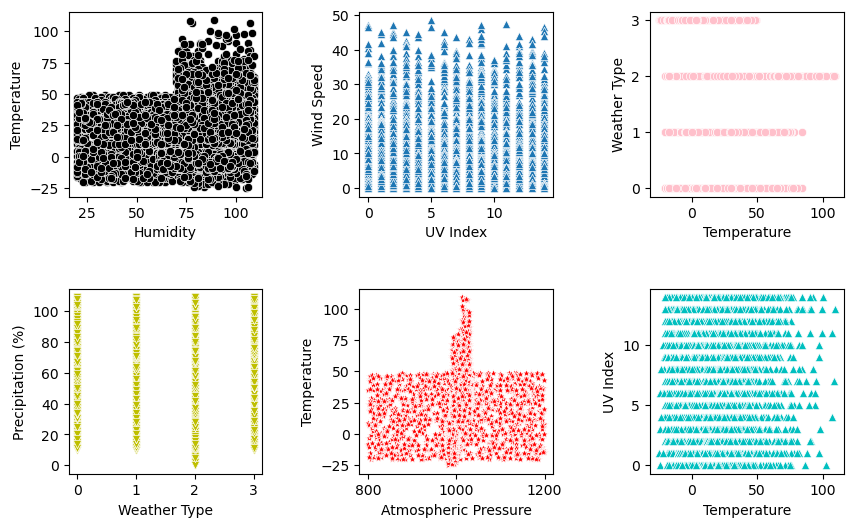

In [43]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(231)
ax=sns.scatterplot(y='Temperature',x='Humidity',color='k',data=df)
ax.set_ylabel('Temperature')
ax.set_xlabel('Humidity')
#2 graph
ax1=plt.subplot(232)
ax1=sns.scatterplot(y='Wind Speed',x='UV Index',marker='^',data=df)
ax1.set_ylabel('Wind Speed')
ax1.set_xlabel('UV Index')
#3 graph
ax2=plt.subplot(233)
ax2=sns.scatterplot(y='Weather Type',x='Temperature',color='pink',marker='o',data=df)
ax2.set_ylabel('Weather Type')
ax2.set_xlabel('Temperature')
#4 graph
ax3=plt.subplot(234)
ax3=sns.scatterplot(y='Precipitation (%)',x='Weather Type',marker='v',color='y',data=df)
ax3.set_ylabel('Precipitation (%)')
ax3.set_xlabel('Weather Type')
#5 graph
ax4=plt.subplot(235)
ax4=sns.scatterplot(y='Temperature',x='Atmospheric Pressure',marker='*',color='r',data=df)
ax4.set_ylabel('Temperature')
ax4.set_xlabel('Atmospheric Pressure')
#6 graph
ax5=plt.subplot(236)
ax5=sns.scatterplot(y='UV Index',x='Temperature',marker='^',color='c',data=df)
ax5.set_ylabel('UV Index')
ax5.set_xlabel('Temperature')
##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

### Regression plot

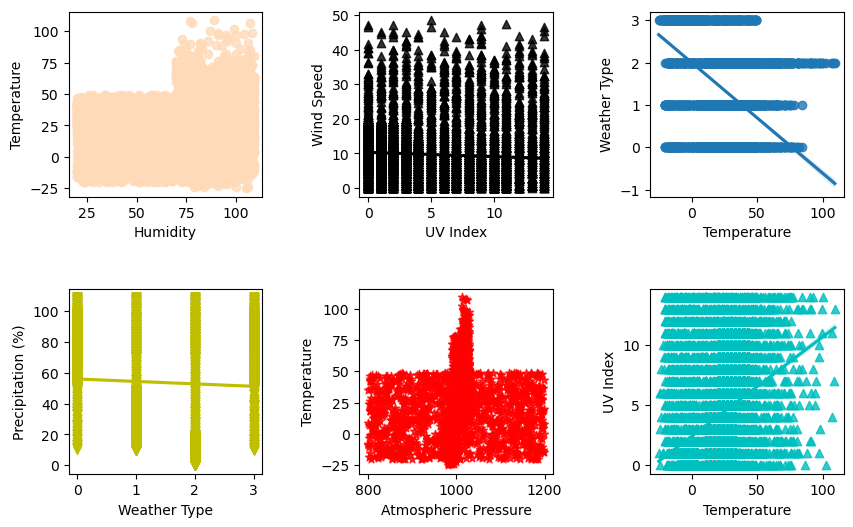

In [45]:
fig=plt.figure(figsize=(10,6))
#1 graph
ax=plt.subplot(231)
ax=sns.regplot(y='Temperature',x='Humidity',color='peachpuff',data=df)
ax.set_ylabel('Temperature')
ax.set_xlabel('Humidity')
#2 graph
ax1=plt.subplot(232)
ax1=sns.regplot(y='Wind Speed',x='UV Index',color='k',marker='^',data=df)
ax1.set_ylabel('Wind Speed')
ax1.set_xlabel('UV Index')
#3 graph
ax2=plt.subplot(233)
ax2=sns.regplot(y='Weather Type',x='Temperature',marker='o',data=df)
ax2.set_ylabel('Weather Type')
ax2.set_xlabel('Temperature')
#4 graph
ax3=plt.subplot(234)
ax3=sns.regplot(y='Precipitation (%)',x='Weather Type',marker='v',color='y',data=df)
ax3.set_ylabel('Precipitation (%)')
ax3.set_xlabel('Weather Type')
#5 graph
ax4=plt.subplot(235)
ax4=sns.regplot(y='Temperature',x='Atmospheric Pressure',marker='*',color='r',data=df)
ax4.set_ylabel('Temperature')
ax4.set_xlabel('Atmospheric Pressure')
#6 graph
ax5=plt.subplot(236)
ax5=sns.regplot(y='UV Index',x='Temperature',marker='^',color='c',data=df)
ax5.set_ylabel('UV Index')
ax5.set_xlabel('Temperature')
##for spacing between the graphs
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#for showing the graphs
plt.show()

### pair plot

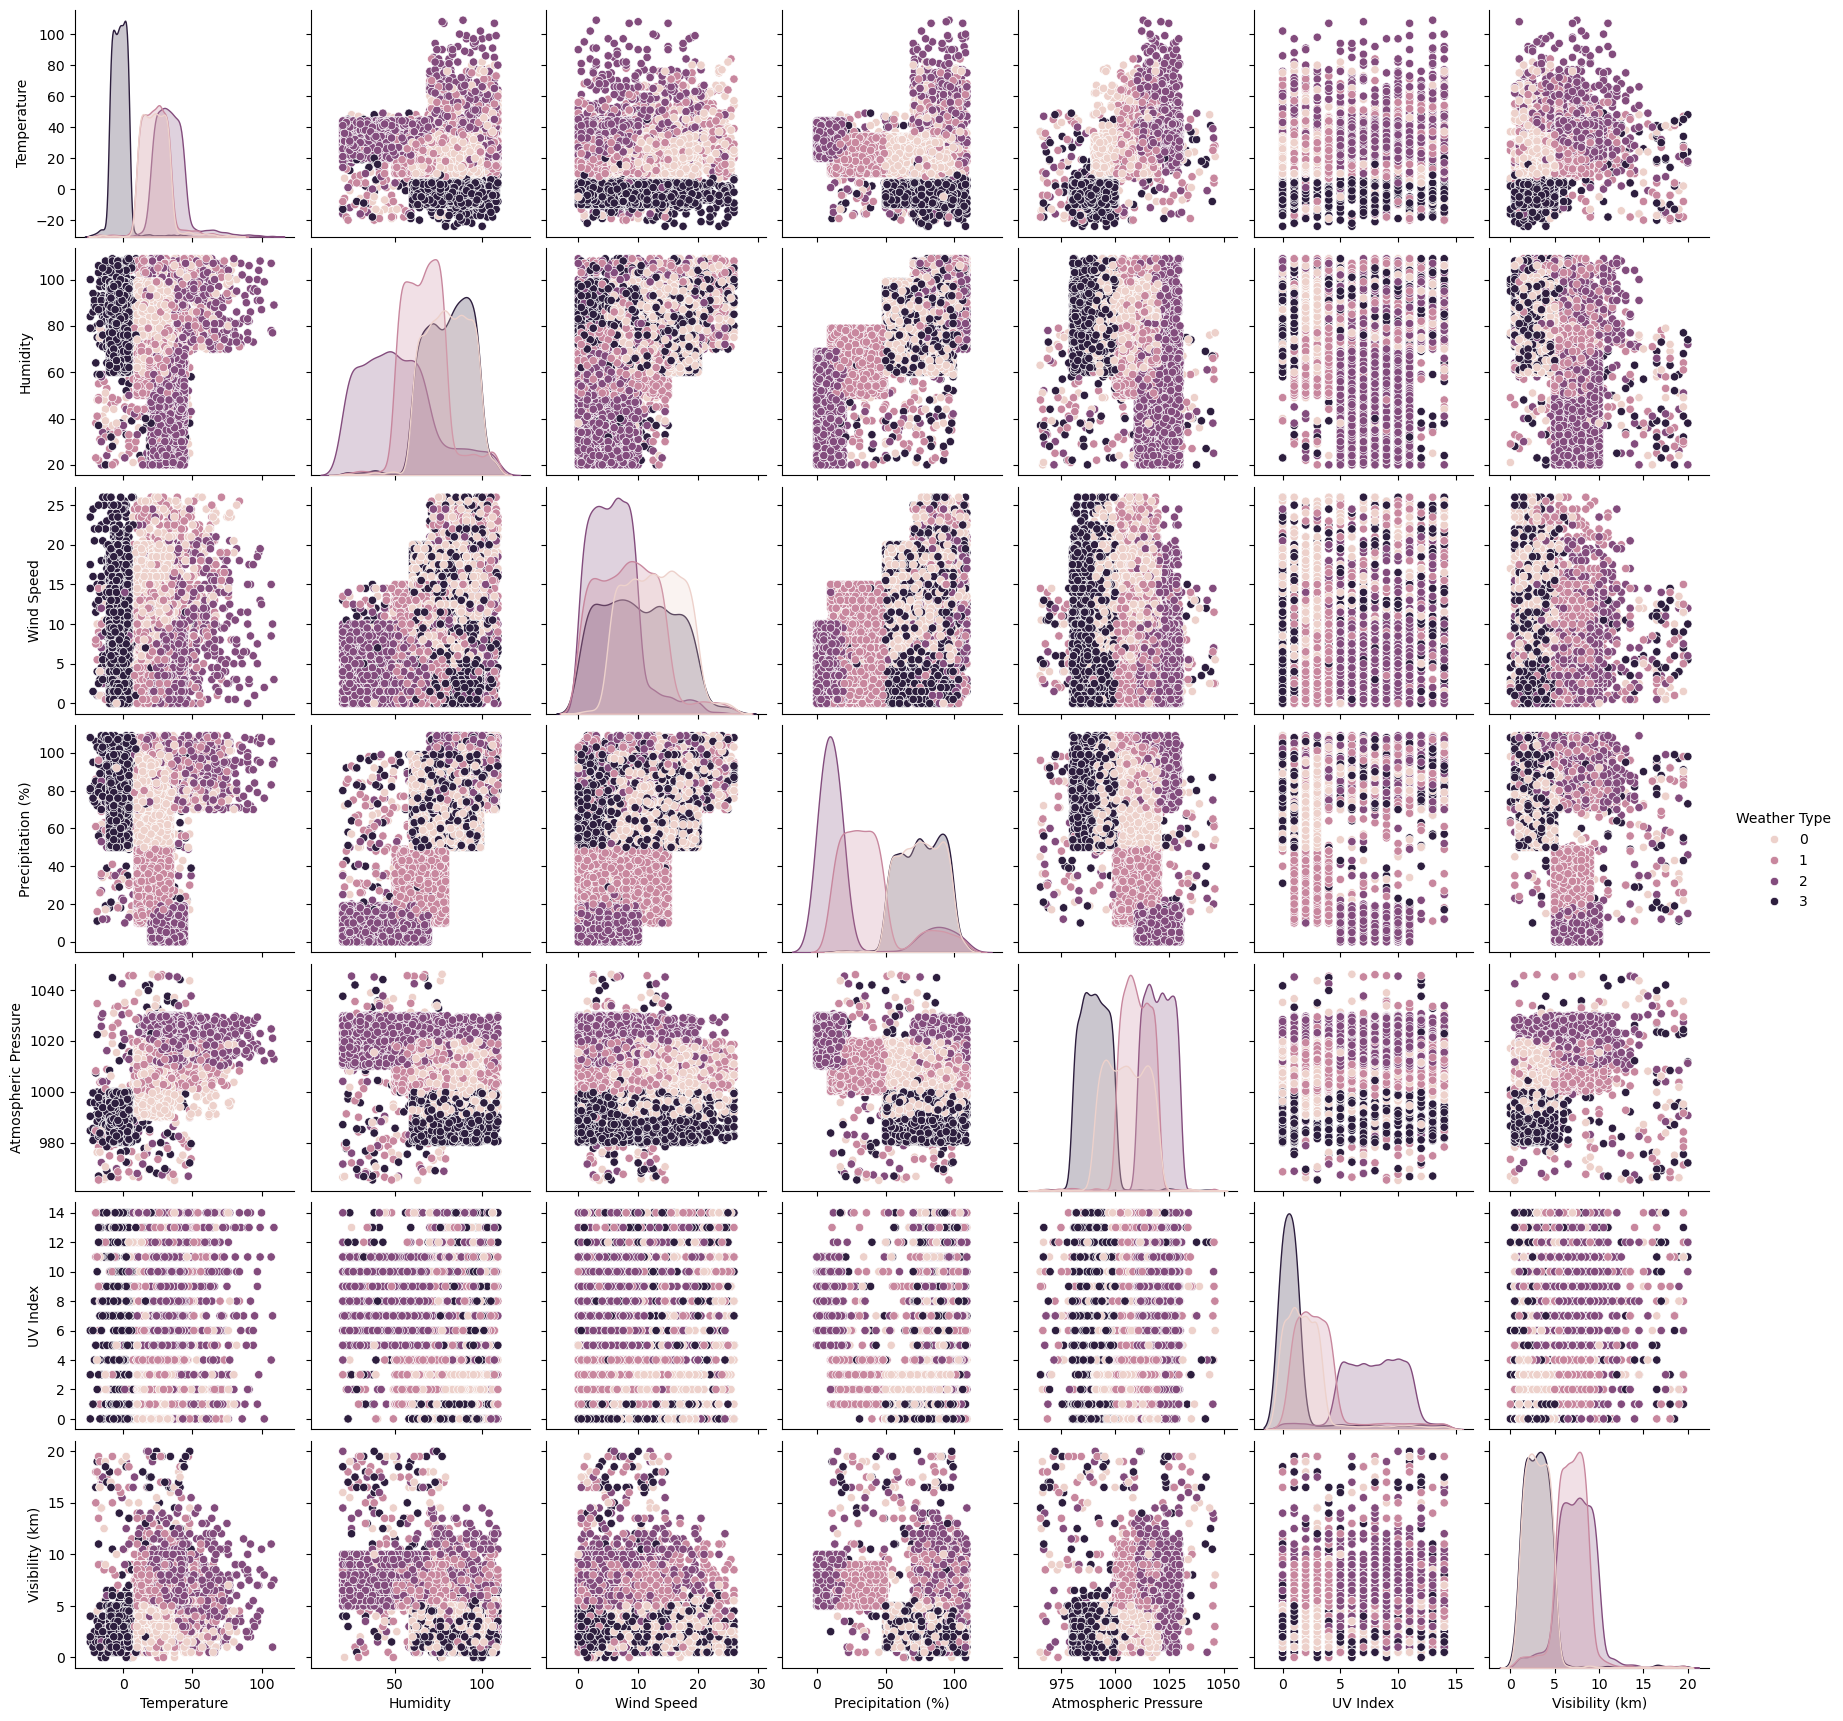

In [47]:
sns.pairplot(df3,hue='Weather Type')

<Axes: >

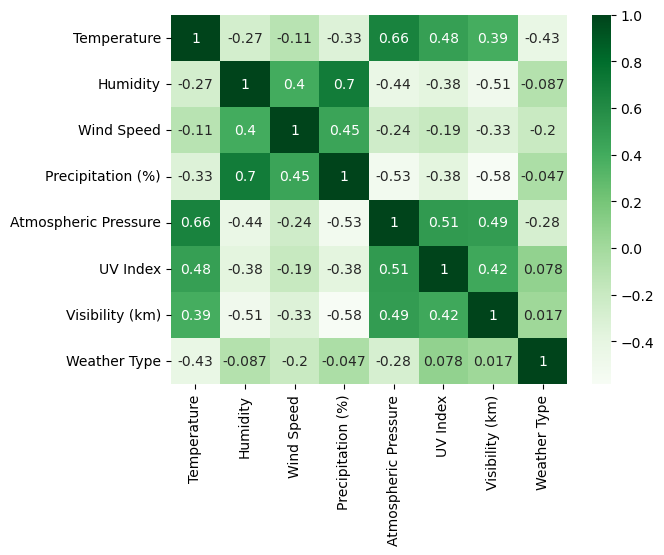

In [48]:
sns.heatmap(df3.corr(),cmap='Greens',annot=True)

## Step 6: SPLIT INDEPENDENT AND DEPENDENT VARIABLES-

In [32]:
x=df3.iloc[:,0:-1]#independent variables
y=df3.iloc[:,-1]   #dependent variables
print(x)
print(y)

       Temperature  Humidity  Wind Speed  Precipitation (%)  \
0               14        73         9.5                 82   
1               39        96         8.5                 71   
2               30        64         7.0                 16   
3               38        83         1.5                 82   
4               27        74        17.0                 66   
...            ...       ...         ...                ...   
11851           29        62        13.0                 17   
11852           10        74        14.5                 71   
11853           30        77         5.5                 28   
11854            3        76        10.0                 94   
11855           -5        38         0.0                 92   

       Atmospheric Pressure  UV Index  Visibility (km)  
0                   1010.82         2              3.5  
1                   1011.43         7             10.0  
2                   1018.72         5              5.5  
3              

## Step 7: TRAIN, TEST AND SPLIT THE MODEL

In [33]:
#diving the data into 80:20 train-test ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)
x_train

Temperature  Humidity  Wind Speed  Precipitation (%)  \
2608            35        68         6.0                  8   
1199            31        51         6.5                 17   
9563            43        48         6.0                 11   
5609            18        60        12.5                 49   
2626             2        87        15.0                 70   
...            ...       ...         ...                ...   
11284            2        68         8.0                 92   
5191            13        98        19.5                 85   
5390             0        83         3.0                 73   
860             17        96        12.0                 66   
7270             2        86        12.5                 53   

       Atmospheric Pressure  UV Index  Visibility (km)  
2608                1021.45        10              5.5  
1199                1010.32        11             10.0  
9563                1026.72        11              8.0  
5609                1014.48         4              8.5  
2626                 992.46         0              2.5  
...                     ...       ...              ...  
11284                994.14         0              3.5  
5191                1014.82         1              1.5  
5390                 984.40         0              3.0  
860                 1008.91         0              3.5  
7270                 989.86         0              5.0  

[9484 rows x 7 columns]

In [34]:
x_test

Temperature  Humidity  Wind Speed  Precipitation (%)  \
8198            15        64        17.0                 96   
6131            31        65         7.0                 82   
554             26        82        18.5                 90   
747             21        50         5.0                 47   
10833           -6        73        13.5                 72   
...            ...       ...         ...                ...   
1745            -4        90        10.0                 62   
5931            41        66         2.0                  8   
11657           43        45         2.5                  0   
11293           23        46         6.0                 18   
11565           28        50         4.5                 17   

       Atmospheric Pressure  UV Index  Visibility (km)  
8198                1009.87         3              3.0  
6131                 995.05         0              2.0  
554                  994.41         2              3.0  
747                 1010.87         3              9.0  
10833                991.99         1              3.5  
...                     ...       ...              ...  
1745                 995.39         1              5.0  
5931                1012.86        10              8.0  
11657               1013.04         7              6.5  
11293               1012.17        10              6.5  
11565               1012.65         7              6.5  

[2372 rows x 7 columns]

In [35]:
y_train

2608     2
1199     2
9563     2
5609     1
2626     3
        ..
11284    3
5191     0
5390     3
860      0
7270     3
Name: Weather Type, Length: 9484, dtype: int64

In [36]:
y_test

8198     0
6131     0
554      0
747      1
10833    3
        ..
1745     3
5931     2
11657    2
11293    2
11565    2
Name: Weather Type, Length: 2372, dtype: int64

## Step 8: Building models-

# Comparison between algorithms-

### 1. Multiple classification model using logistic regression

In [38]:
#importing libraries 
from sklearn.linear_model import LogisticRegression

#building a model named as classifier
classifier = LogisticRegression()
print(classifier)


#fitting the model and balancing-
classifier.fit(x_train,y_train)


LogisticRegression()


C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
#best parameters
#print('Best parameters:\n',classifier.best_params_,'\n')
#print('Best Score:\n',classifier.best_score_,'\n')

#prediction 
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 2 2 2]


In [40]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_c = accuracy_score(y_test, y_pred)
recall_scr_c = recall_score(y_test, y_pred, average='macro')
pre_scr_c = precision_score(y_test, y_pred, average='macro')
f1_scr_c = f1_score(y_test, y_pred, average='macro')
class_report_c = classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_c, '\n')
print('Recall score is:\n', recall_scr_c, '\n')
print('Precision score is:\n', pre_scr_c, '\n')
print('F1 score is:\n', f1_scr_c, '\n')
print('Classification report is:\n', class_report_c)


Accuracy score is:
 0.9118887015177066 

Recall score is:
 0.9125689571033306 

Precision score is:
 0.9123229859687505 

F1 score is:
 0.911769821329747 

Classification report is:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       577
           1       0.91      0.84      0.87       606
           2       0.92      0.90      0.91       601
           3       0.96      0.98      0.97       588

    accuracy                           0.91      2372
   macro avg       0.91      0.91      0.91      2372
weighted avg       0.91      0.91      0.91      2372



### Prediction:

In [41]:
lr_predict= classifier.predict([[15	,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 2. Using Decision Tree Algorithm

In [42]:
#importing libraries 
from sklearn.tree import DecisionTreeClassifier

#PostPruning technique
treemodel = DecisionTreeClassifier()
print(treemodel)

#fitting the model and balancing-
treemodel.fit(x_train,y_train)

#prediction
y_pred= treemodel.predict(x_test)
print(y_pred)

DecisionTreeClassifier()
[0 0 0 ... 2 2 2]


In [43]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_dt = accuracy_score(y_test, y_pred)
recall_scr_dt = recall_score(y_test, y_pred, average='macro')
pre_scr_dt = precision_score(y_test, y_pred, average='macro')
f1_scr_dt = f1_score(y_test, y_pred, average='macro')
class_report_dt= classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_dt, '\n')
print('Recall score is:\n', recall_scr_dt, '\n')
print('Precision score is:\n', pre_scr_dt, '\n')
print('F1 score is:\n', f1_scr_dt, '\n')
print('Classification report is:\n', class_report_dt)


Accuracy score is:
 0.9536256323777403 

Recall score is:
 0.953775903605344 

Precision score is:
 0.9537204995978783 

F1 score is:
 0.9536744536540365 

Classification report is:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       577
           1       0.95      0.92      0.93       606
           2       0.94      0.96      0.95       601
           3       0.98      0.98      0.98       588

    accuracy                           0.95      2372
   macro avg       0.95      0.95      0.95      2372
weighted avg       0.95      0.95      0.95      2372



### Prediction

In [44]:
dt_predict= treemodel.predict([[15	,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### 3. Using Random Forest Algorithm

In [45]:
#model building 
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
print(randomforest)

#fitting and balancing-
randomforest.fit(x_train,y_train)




RandomForestClassifier(random_state=42)


RandomForestClassifier(random_state=42)

In [46]:
#prediction 
y_pred =randomforest.predict(x_test)
print(y_pred)

[0 0 0 ... 2 2 2]


In [47]:
# calculating score:
#importing libraries

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_rf = accuracy_score(y_test, y_pred)
recall_scr_rf = recall_score(y_test, y_pred, average='macro')
pre_scr_rf = precision_score(y_test, y_pred, average='macro')
f1_scr_rf = f1_score(y_test, y_pred, average='macro')
class_report_rf = classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_rf, '\n')
print('Recall score is:\n', recall_scr_rf, '\n')
print('Precision score is:\n', pre_scr_rf, '\n')
print('F1 score is:\n', f1_scr_rf, '\n')
print('Classification report is:\n', class_report_rf)


Accuracy score is:
 0.9612141652613828 

Recall score is:
 0.9613212370950834 

Precision score is:
 0.9616800556833789 

F1 score is:
 0.9613853768284903 

Classification report is:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       577
           1       0.95      0.93      0.94       606
           2       0.94      0.98      0.96       601
           3       0.98      0.98      0.98       588

    accuracy                           0.96      2372
   macro avg       0.96      0.96      0.96      2372
weighted avg       0.96      0.96      0.96      2372



### Prediction

In [48]:
rf_predict= randomforest.predict([[15,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 4.  Using KNN (K NEAREST NEIGHBOUR) Algorithm

In [49]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

#fitting the model
knn.fit(x_train,y_train)

#prediction
y_pred=knn.predict(x_test)

In [50]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_knn = accuracy_score(y_test, y_pred)
recall_scr_knn = recall_score(y_test, y_pred, average='macro')
pre_scr_knn = precision_score(y_test, y_pred, average='macro')
f1_scr_knn = f1_score(y_test, y_pred, average='macro')
class_report_knn = classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_knn, '\n')
print('Recall score is:\n', recall_scr_knn, '\n')
print('Precision score is:\n', pre_scr_knn, '\n')
print('F1 score is:\n', f1_scr_knn, '\n')
print('Classification report is:\n', class_report_knn)


Accuracy score is:
 0.9384485666104553 

Recall score is:
 0.9388972530888461 

Precision score is:
 0.9386632882348825 

F1 score is:
 0.938530860828355 

Classification report is:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       577
           1       0.93      0.89      0.91       606
           2       0.94      0.94      0.94       601
           3       0.98      0.98      0.98       588

    accuracy                           0.94      2372
   macro avg       0.94      0.94      0.94      2372
weighted avg       0.94      0.94      0.94      2372



### Prediction

In [51]:
knn_predict= knn.predict([[15,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 5. Using Naive Baye's Algorithm

In [54]:
#importing libraries
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#fitting-
gnb.fit(x_train, y_train)
#predicting
y_pred=gnb.predict(x_test)


In [56]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_gnb = accuracy_score(y_test, y_pred)
recall_scr_gnb = recall_score(y_test, y_pred, average='macro')
pre_scr_gnb = precision_score(y_test, y_pred, average='macro')
f1_scr_gnb = f1_score(y_test, y_pred, average='macro')
class_report_gnb = classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_gnb, '\n')
print('Recall score is:\n', recall_scr_gnb, '\n')
print('Precision score is:\n', pre_scr_gnb, '\n')
print('F1 score is:\n', f1_scr_gnb, '\n')
print('Classification report is:\n', class_report_gnb)


Accuracy score is:
 0.9262225969645869 

Recall score is:
 0.9268716369271354 

Precision score is:
 0.9269558421324325 

F1 score is:
 0.926272648000518 

Classification report is:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       577
           1       0.93      0.86      0.90       606
           2       0.91      0.92      0.91       601
           3       0.98      0.98      0.98       588

    accuracy                           0.93      2372
   macro avg       0.93      0.93      0.93      2372
weighted avg       0.93      0.93      0.93      2372



### Prediction

In [57]:
gnb_predict= gnb.predict([[15,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## 6. Using Support Vector Machine Algorithm

In [61]:
#importing libraries
from sklearn.svm import SVC
svm = SVC()

#fitting-
svm.fit(x_train, y_train)
#predicting
y_pred=svm.predict(x_test)


In [63]:
# Importing libraries
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Scores
acc_score_svm = accuracy_score(y_test, y_pred)
recall_scr_svm = recall_score(y_test, y_pred, average='macro')
pre_scr_svm = precision_score(y_test, y_pred, average='macro')
f1_scr_svm = f1_score(y_test, y_pred, average='macro')
class_report_svm = classification_report(y_test, y_pred)

print('Accuracy score is:\n', acc_score_svm, '\n')
print('Recall score is:\n', recall_scr_svm, '\n')
print('Precision score is:\n', pre_scr_svm, '\n')
print('F1 score is:\n', f1_scr_svm, '\n')
print('Classification report is:\n', class_report_svm)



Accuracy score is:
 0.8823777403035413 

Recall score is:
 0.8832840967850263 

Precision score is:
 0.8892884510250308 

F1 score is:
 0.8829728992126832 

Classification report is:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       577
           1       0.91      0.81      0.86       606
           2       0.95      0.84      0.89       601
           3       0.94      0.98      0.96       588

    accuracy                           0.88      2372
   macro avg       0.89      0.88      0.88      2372
weighted avg       0.89      0.88      0.88      2372



### Prediction

In [64]:
svm_predict= svm.predict([[15,64,17.0,96,1009.87,3,3.0]])

C:\Users\Ankita\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [65]:
#for representation
scores={'model':['Logistic','Decision Tree','Random Forest','KNN','Naive Bayes','svm'],
       'Accuracy':[acc_score_c, acc_score_dt, acc_score_rf, acc_score_knn, acc_score_gnb,acc_score_svm],
       'Recall_score':[recall_scr_c, recall_scr_dt, recall_scr_rf, recall_scr_knn, recall_scr_gnb, recall_scr_svm],
       'Precision Score':[pre_scr_c, pre_scr_dt, pre_scr_rf, pre_scr_knn, pre_scr_gnb, pre_scr_svm],
      'F1 Score':[f1_scr_c, f1_scr_dt, f1_scr_rf, f1_scr_knn, f1_scr_gnb, f1_scr_svm],}

scorecomp=pd.DataFrame(scores)
#saving file-
scorecomp.to_csv('score_comp.csv',index=False)
scorecomp




model  Accuracy  Recall_score  Precision Score  F1 Score
0       Logistic  0.911889      0.912569         0.912323  0.911770
1  Decision Tree  0.953626      0.953776         0.953720  0.953674
2  Random Forest  0.961214      0.961321         0.961680  0.961385
3            KNN  0.938449      0.938897         0.938663  0.938531
4    Naive Bayes  0.926223      0.926872         0.926956  0.926273
5            svm  0.882378      0.883284         0.889288  0.882973

In [66]:
p_results = {
    'Model': ['Logistic', 'Decision Tree', 'Random Forest','KNN','Naive Bayes','SVM'],
    'Pred_result':[lr_predict, dt_predict, rf_predict,knn_predict ,gnb_predict,svm_predict]

    # Fill in accuracy for applicable models
}

# Create a DataFrame from the results dictionary
p_results_df = pd.DataFrame(p_results)

# Display the DataFrame as a table
p_results_df

Model Pred_result
0       Logistic         [0]
1  Decision Tree         [0]
2  Random Forest         [0]
3            KNN         [0]
4    Naive Bayes         [0]
5            SVM         [0]

### As in this dataset: 
 ### 0:'Rainy'
 ### 1:'Cloudy'
 ### 2:'Sunny'
 ### 3:'Snowy

## Pictorial representation of accuracies

           model  Accuracy
0       Logistic  0.903879
1  Decision Tree  0.957841
2  Random Forest  0.962479
3            KNN  0.948145
4    Naive Bayes  0.934654
5            SVM  0.884907


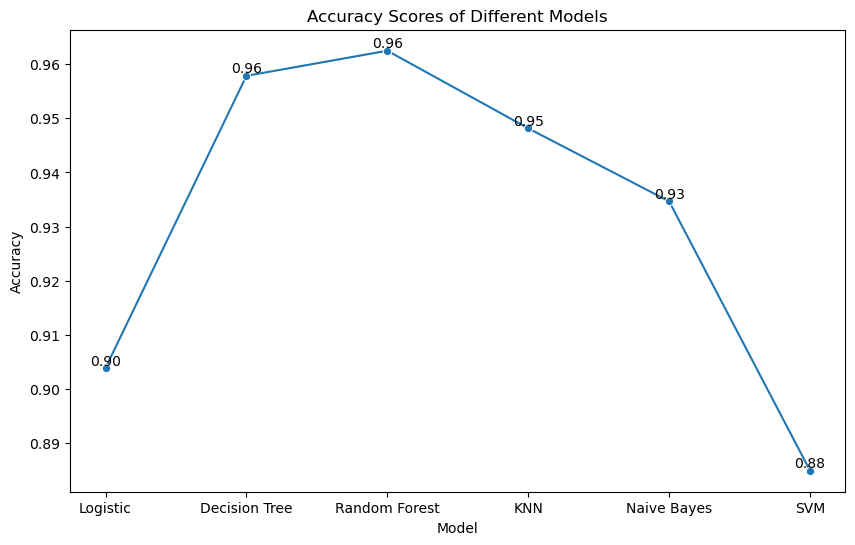

In [96]:
plot = {
    'model': ['Logistic', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','SVM'],
    'Accuracy': [acc_score_c, acc_score_dt, acc_score_rf, acc_score_knn, acc_score_gnb,acc_score_svm]
}

# Create a DataFrame
scorecomp = pd.DataFrame(plot)

# Save the DataFrame to a CSV file
scorecomp.to_csv('score_comp.csv', index=False)

# Display the DataFrame
print(scorecomp)

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=scorecomp, x='model', y='Accuracy', marker='o')

# Add labels to each point
for i, txt in enumerate(scorecomp['Accuracy']):
    plt.text(scorecomp['model'][i], scorecomp['Accuracy'][i], f"{txt:.2f}", ha='center', va='bottom')

# Set plot title and labels
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

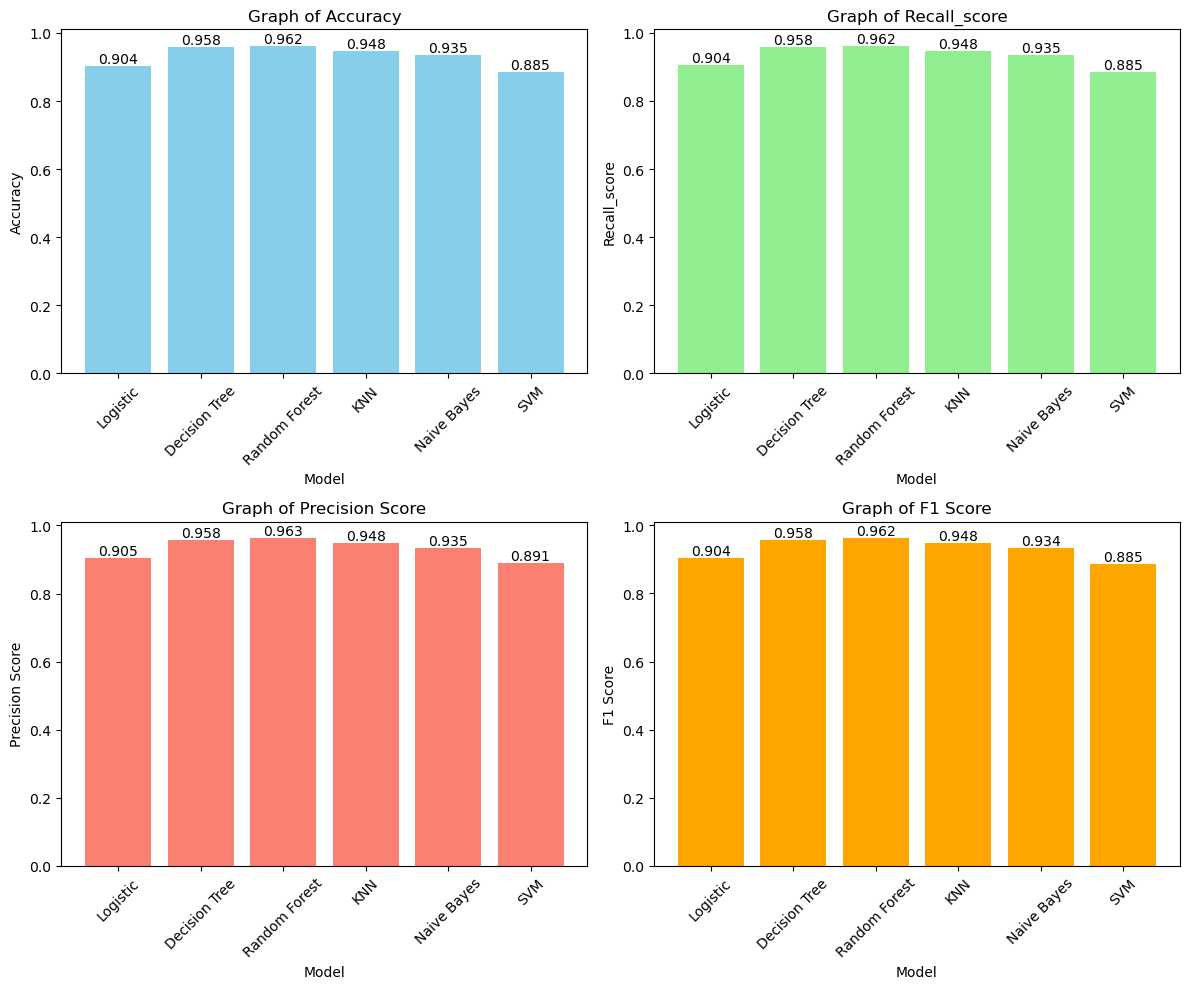

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
scores = {
    'model': ['Logistic', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM'],
    'Accuracy': [acc_score_c, acc_score_dt, acc_score_rf, acc_score_knn, acc_score_gnb, acc_score_svm],
    'Recall_score': [recall_scr_c, recall_scr_dt, recall_scr_rf, recall_scr_knn, recall_scr_gnb, recall_scr_svm],
    'Precision Score': [pre_scr_c, pre_scr_dt, pre_scr_rf, pre_scr_knn, pre_scr_gnb, pre_scr_svm],
    'F1 Score': [f1_scr_c, f1_scr_dt, f1_scr_rf, f1_scr_knn, f1_scr_gnb, f1_scr_svm],
}

# Create DataFrame
scorecomp = pd.DataFrame(scores)

# Plotting graphs for each metric
metrics = ['Accuracy', 'Recall_score', 'Precision Score', 'F1 Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

plt.figure(figsize=(12, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(scorecomp['model'], scorecomp[metric], color=colors[i])
    plt.title(f'Graph of {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    # Add labels on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.tight_layout()
plt.show()


### Using gradio(Interface of Weather Type Detection)

#### Gradio is an open-source Python library that enables users to create beautiful and interactive visualizations of their machine learning models. 
#### It provides a simple and intuitive way to showcase models, allowing users to click, drag, and interact with the data to gain valuable insights

In [5]:
!pip install gradio

     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------  51.2/51.7 kB ? eta -:--:--
     -------------------------------------- 51.7/51.7 kB 440.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.1 MB 7.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/18.1 MB 8.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/18.1 MB 7.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.7/18.1 MB 7.6 MB/s eta 0:00:03
   ---- ----------------------------------- 2.1/18.1 MB 7.9 MB/s eta 0:00:03
   ----- ---------------------------------- 2.6/18.1 MB 8.2 MB/s eta 0:00:02
   ------ --------------------------------- 3.1/18.1 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.6/18.1 MB 8.2 MB/s eta 0:00:02
   --------- ------------------------------ 4.4/18.1 MB 8.7 MB/s eta 0:00:02
   ---------

In [17]:
import gradio as gr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('weather1.csv')

# Features and target variable
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']]
y = df['Weather Type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train the models
for model in models.values():
    model.fit(X_train, y_train)

# Prediction function
def predict_weather(temperature, humidity, wind_speed, precipitation, pressure, uv_index, visibility, model_name):
    model = models[model_name]
    input_data = [[temperature, humidity, wind_speed, precipitation, pressure, uv_index, visibility]]
    prediction = model.predict(input_data)[0]
    return prediction

# Create Gradio interface without flag option
interface = gr.Interface(
    fn=predict_weather,
    inputs=[
        gr.Number(label="Temperature"),
        gr.Number(label="Humidity"),
        gr.Number(label="Wind Speed"),
        gr.Number(label="Precipitation (%)"),
        gr.Number(label="Atmospheric Pressure"),
        gr.Number(label="UV Index"),
        gr.Number(label="Visibility (km)"),
        gr.Dropdown(choices=["Naive Bayes", "KNN", "SVM", "Random Forest", "Decision Tree", "Logistic Regression"], label="Select Model")
    ],
    outputs="text",
    title="Weather Type Prediction",
    description="Enter weather parameters and select a model to predict the weather type."
)

# Launch the interface
interface.launch()


C:\Users\Ankita\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
